In [ ]:
import xarray
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
pip install netcdf4

In [ ]:
datadir = "/content/drive/My Drive/FYP files/NO5.nc"

In [ ]:
ds = xarray.open_dataset(datadir, group = '/PRODUCT')

In [ ]:
ds

<xarray.Dataset>
Dimensions:                                        (corner: 4, ground_pixel: 450, layer: 34, scanline: 357, time: 1)
Coordinates:
  * scanline                                       (scanline) float64 0.0 ... 356.0
  * ground_pixel                                   (ground_pixel) float64 0.0 ... 449.0
  * time                                           (time) datetime64[ns] 2020-11-12
  * corner                                         (corner) float64 0.0 ... 3.0
  * layer                                          (layer) int32 0 1 2 ... 32 33
Data variables:
    latitude                                       (time, scanline, ground_pixel) float32 ...
    longitude                                      (time, scanline, ground_pixel) float32 ...
    delta_time                                     (time, scanline, ground_pixel) datetime64[ns] ...
    time_utc                                       (time, scanline) object ...
    qa_value                                       (time, scanline, ground_pixel) float32 ...
    sulfurdioxide_total_vertical_column            (time, scanline, ground_pixel) float32 ...
    sulfurdioxide_total_vertical_column_precision  (time, scanline, ground_pixel) float32 ...

In [ ]:
ds.sulfurdioxide_total_vertical_column

<xarray.DataArray 'sulfurdioxide_total_vertical_column' (time: 1, scanline: 357, ground_pixel: 450)>
[160650 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 3.0 ... 353.0 354.0 355.0 356.0
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
  * time          (time) datetime64[ns] 2020-11-12
Attributes:
    units:                                                 mol m-2
    standard_name:                                         atmosphere_mole_co...
    long_name:                                             total vertical col...
    coordinates:                                           /PRODUCT/longitude...
    multiplication_factor_to_convert_to_DU:                2241.15
    multiplication_factor_to_convert_to_molecules_percm2:  6.02214e+19

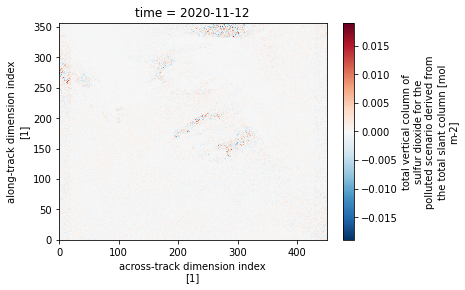

In [ ]:
ds.sulfurdioxide_total_vertical_column.plot()

In [ ]:
ds = ds.set_coords(["longitude", "latitude"])

In [ ]:
so2 = ds.sulfurdioxide_total_vertical_column

In [ ]:
path = "/content/drive/My Drive/so2_subset.nc"

In [ ]:
so2_subset = so2.where(so2.longitude < 74.5, drop= True).where(so2.longitude > 74, drop= True).where(so2.latitude<31.6, drop= True).where(so2.latitude > 31.3, drop= True)

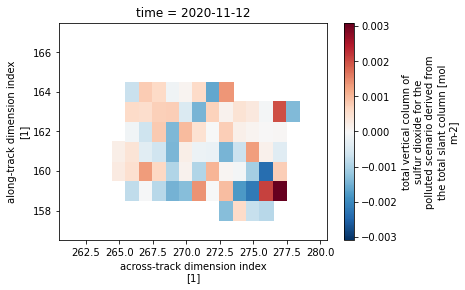

In [ ]:
so2_subset.sel(scanline = slice(157, 167), ground_pixel = slice(261, 280)).plot()



In [ ]:
so2_subset.to_netcdf(path)